Example script comparing optimization methods on a toy problem

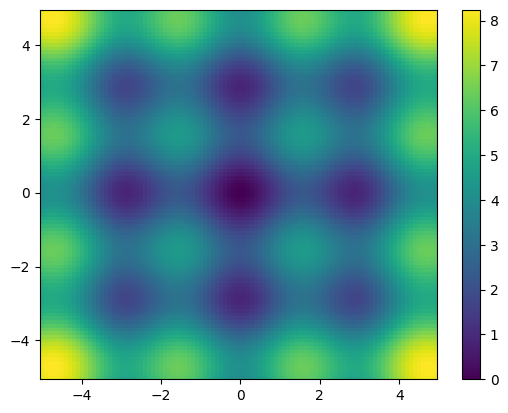

In [9]:
import numpy as np
import matplotlib.pyplot as plt
#import minimize if you plan to use it.
from scipy.optimize import minimize

#setup for plotting
xvals = np.arange(-5,5,0.1)
yvals = np.arange(-5,5,0.1)
X,Y = np.meshgrid(xvals,yvals)

#function parameters
freq = 2*np.pi/3.0
amp = 5.0
quad = 0.1

#Plot of the function we are going to optimize
fxy = 2+quad*(X**2)+quad*(Y**2)-(np.cos(freq*X)+np.cos(freq*Y))
plt.pcolormesh(X,Y,fxy, shading='auto')
plt.colorbar()
plt.show()

The EggCrate function has many sinesoidal local minimums in x and y
In this case there is also a broad parabolic shape which minimizes at 0,0
An overall constant is added so that the minimum is exactly zero.

In [10]:
def EggCrate(fparam):
  x = fparam[0]
  y = fparam[1]
  return 2+quad*(x**2)+quad*(y**2)-(np.cos(freq*x)+np.cos(freq*y))

This callback function will be called every iteration

In [11]:
#I will stack the current values into a list that will be used to track the progress
traj = []
def callbackF(fparam):
  traj.append(fparam)

In [12]:
#initial location will be near a local minimum
param0 = [-3, 4.0]
#upper and lower bounds for each parameter
bnds = ((-8.0, 8.0), (-8.0, 8.0))

We will compare three methods, TNC, Nelder-Mead, and Powell

TNC is a Newton gradient-based method

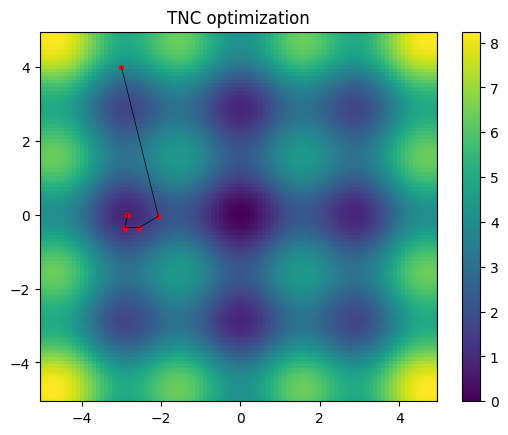

In [13]:
traj = []
traj.append(param0)
res = minimize(EggCrate, param0, method='TNC', bounds=bnds, callback=callbackF, options={'disp': True})

#Plot trajectory for TNC
traj = np.array(traj)
fxy = 2+quad*(X**2)+quad*(Y**2)-(np.cos(freq*X)+np.cos(freq*Y))
plt.pcolormesh(X,Y,fxy, shading='auto')
plt.colorbar()
plt.plot(traj[:,0],traj[:,1],color='black',linewidth=0.5)
plt.scatter(traj[:,0],traj[:,1],color='red',s=8)
plt.title('TNC optimization')
plt.savefig('day3_func_optim_1.png', bbox_inches='tight')
plt.show()

Nelder-Mead is a simplex method

Optimization terminated successfully.
         Current function value: 1.721029
         Iterations: 33
         Function evaluations: 65


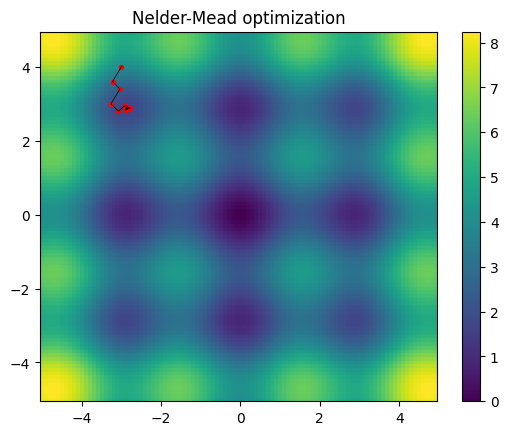

In [14]:
traj = []
traj.append(param0)
res = minimize(EggCrate, param0, method='Nelder-Mead', bounds=bnds, callback=callbackF, options={'disp': True})

#Plot trajectory for TNC
traj = np.array(traj)
fxy = 2+quad*(X**2)+quad*(Y**2)-(np.cos(freq*X)+np.cos(freq*Y))
plt.pcolormesh(X,Y,fxy, shading='auto')
plt.colorbar()
plt.plot(traj[:,0],traj[:,1],color='black',linewidth=0.5)
plt.scatter(traj[:,0],traj[:,1],color='red',s=8)
plt.title('Nelder-Mead optimization')
plt.savefig('day3_func_optim_2.png', bbox_inches='tight')
plt.show()

Powell is a conjugate direction method

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 26


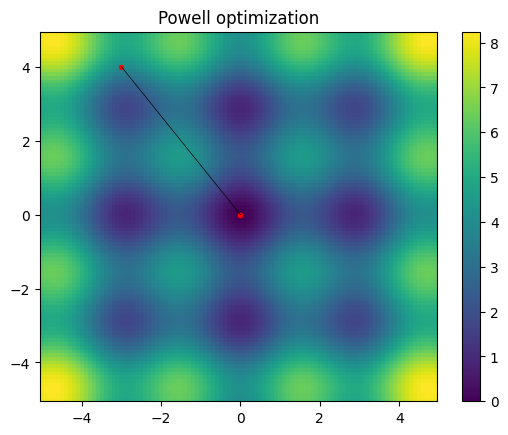

In [15]:
traj = []
traj.append(param0)
res = minimize(EggCrate, param0, method='Powell', bounds=bnds, callback=callbackF, options={'disp': True})

#Plot trajectory for Powell
traj = np.array(traj)
fxy = 2+quad*(X**2)+quad*(Y**2)-(np.cos(freq*X)+np.cos(freq*Y))
plt.pcolormesh(X,Y,fxy, shading='auto')
plt.colorbar()
plt.plot(traj[:,0],traj[:,1],color='black',linewidth=0.5)
plt.scatter(traj[:,0],traj[:,1],color='red',s=8)
plt.title('Powell optimization')
plt.savefig('day3_func_optim_3.png', bbox_inches='tight')
plt.show()

The coordinates happened to be aligned, so let's examine how Powell handles a tilt

Optimization terminated successfully.
         Current function value: 0.860514
         Iterations: 3
         Function evaluations: 71


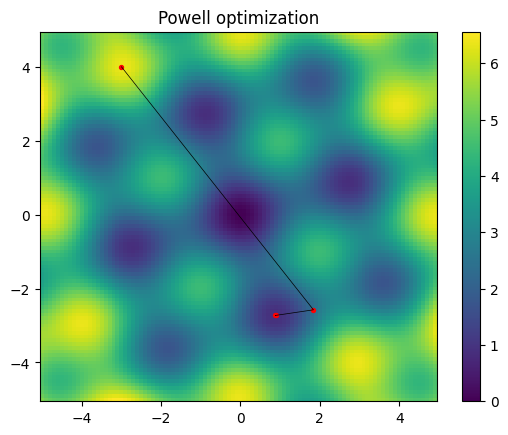

In [16]:
ang = np.pi*0.1
def EggCrateTilt(fparam):
  x = fparam[0]
  y = fparam[1]
  u = x*np.cos(ang) + y*np.sin(ang)
  v = -x*np.sin(ang) + y*np.cos(ang)
  return 2+quad*(x**2)+quad*(y**2)-(np.cos(freq*u)+np.cos(freq*v))

#Powell vs tilted eggcrate
traj = []
traj.append(param0)
res = minimize(EggCrateTilt, param0, method='Powell', bounds=bnds, callback=callbackF, options={'disp': True})

#Plot trajectory for Powell vs tilted
U = X*np.cos(ang) + Y*np.sin(ang)
V = -X*np.sin(ang) + Y*np.cos(ang)
fxy = 2+quad*(X**2)+quad*(Y**2)-(np.cos(freq*U)+np.cos(freq*V))
traj = np.array(traj)
plt.pcolormesh(X,Y,fxy, shading='auto')
plt.colorbar()
plt.plot(traj[:,0],traj[:,1],color='black',linewidth=0.5)
plt.scatter(traj[:,0],traj[:,1],color='red',s=8)
plt.title('Powell optimization')
plt.savefig('day3_func_optim_3.png', bbox_inches='tight')
plt.show()